<a href="https://colab.research.google.com/github/brexcoding/Tr3hub/blob/main/first_regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('USDJPY')
data

,Unnamed: 0.1,Unnamed: 0,Time,Open,High,Low,Close,tick_volume,spread,real_volume,...,three_outside,three_line_strike,sticksandwish,darkcloudcover,BearishCross,eveningstar,eveningdojistar,gravestonedoji,invertedhammer,hangingman
0,0,0,2023-01-05 03:39:00,131.951,131.961,131.867,131.945,474,15,0,...,0,0,0,0,False,0,0,0,0,0
1,1,1,2023-01-05 03:42:00,131.946,131.981,131.904,131.910,436,15,0,...,0,0,0,0,False,0,0,0,0,0
2,2,2,2023-01-05 03:45:00,131.911,131.911,131.834,131.848,486,15,0,...,0,0,0,0,False,0,0,0,0,0
3,3,3,2023-01-05 03:48:00,131.846,131.891,131.825,131.881,449,15,0,...,0,0,0,0,False,0,0,0,0,0
4,4,4,2023-01-05 03:51:00,131.882,131.882,131.838,131.877,396,15,0,...,0,0,0,0,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8439,8439,8439,2023-01-30 17:36:00,130.317,130.355,130.301,130.317,524,15,0,...,0,0,0,0,False,0,0,0,0,0
8440,8440,8440,2023-01-30 17:39:00,130.316,130.333,130.288,130.309,408,15,0,...,0,0,0,0,False,0,0,0,0,0
8441,8441,8441,2023-01-30 17:42:00,130.310,130.313,130.224,130.230,486,15,0,...,0,0,0,0,False,0,0,0,0,0
8442,8442,8442,2023-01-30 17:45:00,130.227,130.261,130.202,130.253,361,15,0,...,0,0,0,0,False,0,0,0,0,0


<Axes: >

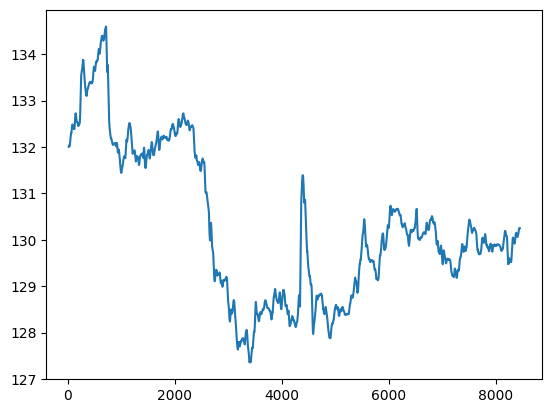

In [7]:
data['sma_20'].plot()

In [5]:
#spliting data
train_data = data.iloc[:int(.70*len(data)) , :]
test_data = data.iloc[int(.70*len(data)): , :]

In [13]:
features = ['Open', 'Close','tick_volume']
target = 'Close'

In [14]:
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
predictions = model.predict(test_data[features])
print('model predictions :')
print(predictions)

model predictions :
[129.87097 129.84952 129.83038 ... 130.24525 130.25554 130.255  ]


In [19]:
print(test_data[target])

5910    129.865
5911    129.848
5912    129.831
5913    129.843
5914    129.845
         ...   
8439    130.317
8440    130.309
8441    130.230
8442    130.253
8443    130.252
Name: Close, Length: 2534, dtype: float64


In [20]:
#show the model accuracy
accuracy = model.score(test_data[features], test_data[target])
print(accuracy)

0.9991672402280259


<function matplotlib.pyplot.show(close=None, block=None)>

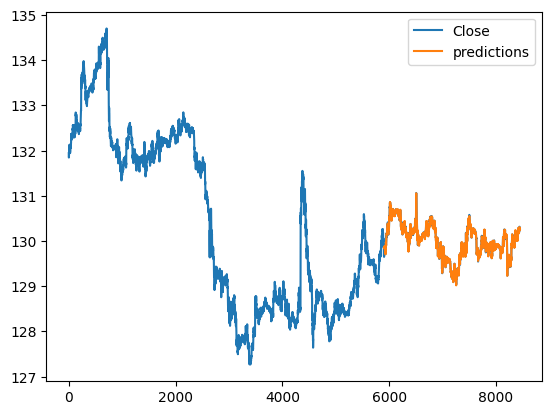

In [24]:
# ploing the predictions
close = data['Close']
plt.plot(data['Close'], label = 'Close')
plt.plot(test_data[target].index , predictions , label = 'predictions')
plt.legend()
plt.show